# Exploratory Data Analysis - Data.Rio Data Lake

#### Import modules and libraries

In [3]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns; sns.set()
from IPython.display import clear_output as co

#### Load Data

In [4]:
class Data:
    path = '../../../Dados/Desafio COR-Rio IV/Meio Ambiente Clima/'

inmet = pd.read_csv(Data.path + 'Meteorologia_INMET.csv'); inmet.head(3)

,primary_key,id_estacao,data,horario,pressao,pressao_minima,pressao_maxima,temperatura_orvalho,temperatura_orvalho_minimo,temperatura_orvalho_maximo,...,umidade_maxima,temperatura,temperatura_minima,temperatura_maxima,rajada_vento_max,direcao_vento,velocidade_vento,radiacao_global,acumulado_chuva_1_h,data_particao
0,A602-2012-04-01 21:00:00,A602,2012-04-01,21:00:00,1014.5,1014.5,1014.7,NaN,NaN,NaN,...,NaN,24.3,24.2,24.7,5.0,NaN,4.0,74.565,0.0,2012-04-01
1,A602-2012-04-01 17:00:00,A602,2012-04-01,17:00:00,1014.5,1014.5,1015.0,NaN,NaN,NaN,...,NaN,25.9,25.2,26.6,5.1,NaN,4.1,2817.476,0.0,2012-04-01
2,A602-2012-04-01 16:00:00,A602,2012-04-01,16:00:00,1015.0,1014.9,1015.7,NaN,NaN,NaN,...,NaN,25.9,24.6,26.3,4.7,NaN,3.8,2913.985,0.0,2012-04-01


---
# 2. Exploratory Data Analysis

### 1. Data types

In [6]:
id_cols = ['primary_key', 'id_estacao', 'data', 'horario', 'data_particao']
float_cols = set(inmet.columns).difference(id_cols)

### 2. Index and identity columns

#### Index check

In [7]:
print('Unique values in index:', inmet['primary_key'].unique().shape[0])
print('Dataset size:', inmet.shape[0])

Unique values in index: 964871
Dataset size: 1036001


Duplicate index keys found. The number of unique index values does not match the index size.

#### Identity columns check

In [8]:
inmet.groupby(id_cols[1:4]).first().shape

(964871, 19)

The count of combinations of the three identity columns should match the index size. The number of combinations found match the number of unique index values found.

### 3. Primary key duplicates

#### Primary key column duplicates count

In [15]:
key_count = inmet['primary_key'].value_counts()
dup_keys = key_count[key_count>1]

(dup_keys==2).all()

True

Every duplicate key can be found exactly twice.

#### Sample duplicates

In [23]:
inmet.set_index('primary_key').loc[dup_keys.sample(2).index]

,id_estacao,data,horario,pressao,pressao_minima,pressao_maxima,temperatura_orvalho,temperatura_orvalho_minimo,temperatura_orvalho_maximo,umidade,...,umidade_maxima,temperatura,temperatura_minima,temperatura_maxima,rajada_vento_max,direcao_vento,velocidade_vento,radiacao_global,acumulado_chuva_1_h,data_particao
primary_key,,,,,,,,,,,,,,,,,,,,,
A621-2021-06-18 17:00:00,A621,2021-06-18,17:00:00,1018.9,1018.3,1019.0,14.8,14.0,14.9,NaN,...,NaN,21.5,21.5,22.7,3.9,NaN,1.5,278.100,0.0,2021-06-18
A621-2021-06-18 17:00:00,A621,2021-06-18,17:00:00,1018.1,1018.0,1018.8,13.5,11.7,14.6,NaN,...,NaN,24.1,23.5,25.0,5.3,NaN,2.4,1959.587,0.0,2021-06-18
A636-2021-05-21 10:00:00,A636,2021-05-21,10:00:00,1012.9,1012.3,1012.9,18.7,18.5,18.7,NaN,...,NaN,20.2,20.0,20.2,0.8,NaN,0.1,22.231,0.0,2021-05-21
A636-2021-05-21 10:00:00,A636,2021-05-21,10:00:00,1013.0,1013.0,1013.4,18.6,18.0,19.3,NaN,...,NaN,24.9,23.4,24.9,4.9,NaN,1.7,1638.300,0.0,2021-05-21


Rows with the same index key do not contain the same values but values are very close, as if they were sequential or very close in time. Hint: Average duplicates in data cleaning.

### 3. Identity columns' values

#### Stations' records count

In [32]:
inmet['id_estacao'].value_counts().to_frame('Registros')

,Registros
A602,126914
A652,126630
A621,126451
A636,126446
A655,105912
A654,105912
A656,105912
A653,105912
A651,105912


In [68]:
dates = pd.to_datetime(inmet['data'].unique()).sort_values()

In [70]:
dates.min(), dates.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2022-06-02 00:00:00'))

In [75]:
dates.shape, dates.shape[0]*24

((4536,), 108864)

## Date time description

In [178]:
len(inmet.index.unique())

108852

#### Start and end of time series

In [329]:
data.index.min(), data.index.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2022-06-02 23:00:00'))

#### Time range in days

In [330]:
time_range = data.index.max() - data.index.min(); time_range

Timedelta('4535 days 23:00:00')

#### Time range in hours

In [331]:
time_range.days * 24 + time_range.seconds / 60 / 60

108863.0

#### Date time range size

In [21]:
new_index = pd.date_range(data.index.min(), data.index.max(), freq='H')

len(new_index)

108864

#### Unique date times and stations

In [22]:
n_unique = len(data.index.unique());
n_stations = len(data['id_estacao'].unique())

n_unique, n_stations

(108852, 9)

#### All missing hours in dataset

In [23]:
set(new_index).difference(data.index.unique())

{Timestamp('2022-04-13 19:00:00', freq='H'),
 Timestamp('2022-04-13 20:00:00', freq='H'),
 Timestamp('2022-04-13 21:00:00', freq='H'),
 Timestamp('2022-04-13 22:00:00', freq='H'),
 Timestamp('2022-04-13 23:00:00', freq='H'),
 Timestamp('2022-05-12 17:00:00', freq='H'),
 Timestamp('2022-05-12 18:00:00', freq='H'),
 Timestamp('2022-05-12 19:00:00', freq='H'),
 Timestamp('2022-05-12 20:00:00', freq='H'),
 Timestamp('2022-05-12 21:00:00', freq='H'),
 Timestamp('2022-05-12 22:00:00', freq='H'),
 Timestamp('2022-05-12 23:00:00', freq='H')}

#### Stations times unique hours

In [334]:
n_unique * n_stations

979668

#### Number of observations

In [335]:
data.shape

(964871, 22)

## Missing Values

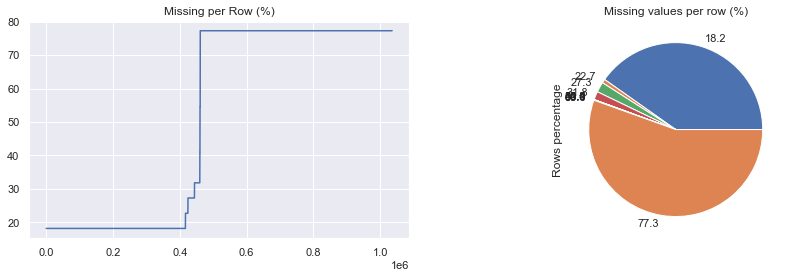

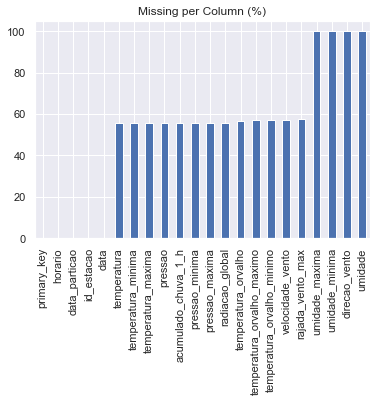

In [394]:
#### Missing per row

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
nan_prct = (100 * inmet.isna().sum(1).sort_values() / inmet.shape[1]).rename('Missing Percantage')
nan_prct.reset_index(drop=True).plot(title='Missing per Row (%)', ax=ax[0])

nan_prct = (inmet.isna().sum(1).value_counts().sort_index()/len(inmet)).rename('Rows percentage')
nan_prct.index = (100 * nan_prct.index.values / inmet.shape[1]).round(1)
nan_prct.iloc[:5].plot.pie(title='Missing values per row (%)', ax=ax[1]); plt.show()

#### Missing per column

nan_prct = (100 * inmet.isna().sum().sort_values() / len(inmet)).rename('Missing Percantage')
nan_prct.plot.bar(title='Missing per Column (%)'); plt.show()

## Metheorological Stations

#### Record count per day per station

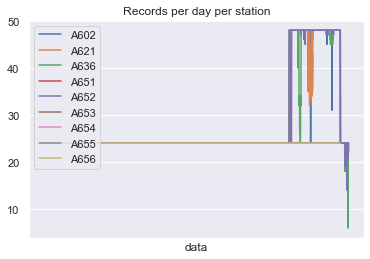

In [395]:
ax = inmet.groupby(['data', 'id_estacao']).count()['primary_key'].unstack().plot(xticks=[], title='Records per day per station')
ax.legend(loc='upper left')
plt.show()

Conclusion: Stations have fixed 24 records per day. Some periods show 48 records per day indicating duplicates

#### Total observations per station

In [337]:
inmet['id_estacao'].value_counts()#.plot.bar()

A602    126914
A652    126630
A621    126451
A636    126446
A655    105912
A656    105912
A654    105912
A653    105912
A651    105912
Name: id_estacao, dtype: int64

---
# 1. Data Cleaning

#### Datetime data type conversion

In [14]:
inmet['date-time'] = pd.to_datetime(inmet['data'] + ' ' + inmet['horario'])
inmet.set_index(['date-time'], inplace=True)

In [15]:
inmet.dtypes

primary_key                    object
id_estacao                     object
data                           object
horario                        object
pressao                       float64
pressao_minima                float64
pressao_maxima                float64
temperatura_orvalho           float64
temperatura_orvalho_minimo    float64
temperatura_orvalho_maximo    float64
umidade                       float64
umidade_minima                float64
umidade_maxima                float64
temperatura                   float64
temperatura_minima            float64
temperatura_maxima            float64
rajada_vento_max              float64
direcao_vento                 float64
velocidade_vento              float64
radiacao_global               float64
acumulado_chuva_1_h           float64
data_particao                  object
dtype: object

#### Remove Duplicates

In [19]:
data = inmet.drop_duplicates(subset=['id_estacao', 'data', 'horario'])

len(inmet), len(data)

(1036001, 964871)

---
# Merging datasets

#### Options:

1. stack all stations' variables as columns, inside defined frenquecy
2. New columns for first, second, third, etc, closest stations variables.

#### Stacking stations observations

In [268]:
def merge_groups(df, group_col, drop_cols=[], how='outer'):
    groups = df[group_col].unique()
    for group in groups:
        group_df = df[df[group_col]==group].drop(drop_cols, 1)
        group_df = group_df.rename(columns={col: col+' - '+group for col in group_df.columns})
        if group==groups[0]:
            stacked = group_df; continue
        stacked = pd.merge(stacked, group_df, on=group_df.index.name, how=how)
    return stacked

def concat_groups(df, group_col, drop_cols=[], how='outer'):
    dfs = []; groups = df[group_col].unique()
    for group in groups:
        group_df = df[df[group_col]==group].drop(drop_cols, 1).add_suffix(' - '+group)
        group_df = group_df
        dfs.append(group_df)
    return pd.concat(dfs)

#### Merging stations datasets

In [319]:
merge = merge_groups(
    data, group_col='id_estacao',
    drop_cols=inmet_keys
)

merge.shape

(108852, 153)

In [402]:
merge#.head(3)

,pressao - A602,pressao_minima - A602,pressao_maxima - A602,temperatura_orvalho - A602,temperatura_orvalho_minimo - A602,temperatura_orvalho_maximo - A602,umidade - A602,umidade_minima - A602,umidade_maxima - A602,temperatura - A602,...,umidade_minima - A656,umidade_maxima - A656,temperatura - A656,temperatura_minima - A656,temperatura_maxima - A656,rajada_vento_max - A656,direcao_vento - A656,velocidade_vento - A656,radiacao_global - A656,acumulado_chuva_1_h - A656
datetime,,,,,,,,,,,,,,,,,,,,,
2012-04-01 21:00:00,1014.5,1014.5,1014.7,NaN,NaN,NaN,NaN,NaN,NaN,24.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01 17:00:00,1014.5,1014.5,1015.0,NaN,NaN,NaN,NaN,NaN,NaN,25.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01 16:00:00,1015.0,1014.9,1015.7,NaN,NaN,NaN,NaN,NaN,NaN,25.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01 23:00:00,1015.5,1014.9,1015.5,NaN,NaN,NaN,NaN,NaN,NaN,23.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01 08:00:00,1014.9,1014.6,1014.9,NaN,NaN,NaN,NaN,NaN,NaN,20.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-24 18:00:00,1023.6,1023.6,1024.1,15.8,14.7,16.2,NaN,NaN,NaN,24.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-24 20:00:00,1023.6,1023.4,1023.6,16.7,15.2,16.7,NaN,NaN,NaN,22.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-24 21:00:00,1023.6,1023.5,1023.7,16.5,16.4,16.8,NaN,NaN,NaN,21.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Result Analysis

#### Missing per column

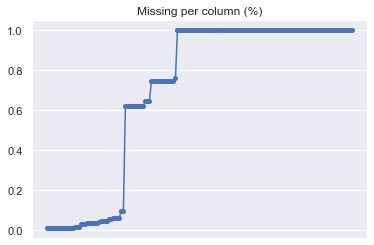

In [313]:
nan_merge = merge.isna().sum().sort_values() / len(merge)

nan_merge.plot(title='Missing per column (%)', xticks=[], marker='o', ms=4); plt.show()

#### Missing per row

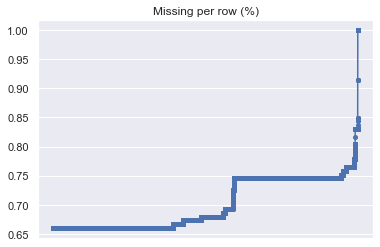

In [383]:
nan_merge = merge.isna().sum(1).sort_values() / merge.shape[1]

nan_merge.reset_index(drop=True).plot(title='Missing per row (%)', xticks=[], marker='o', ms=4); plt.show()

In [401]:
merge.reindex(new_index)

,pressao - A602,pressao_minima - A602,pressao_maxima - A602,temperatura_orvalho - A602,temperatura_orvalho_minimo - A602,temperatura_orvalho_maximo - A602,umidade - A602,umidade_minima - A602,umidade_maxima - A602,temperatura - A602,...,umidade_minima - A656,umidade_maxima - A656,temperatura - A656,temperatura_minima - A656,temperatura_maxima - A656,rajada_vento_max - A656,direcao_vento - A656,velocidade_vento - A656,radiacao_global - A656,acumulado_chuva_1_h - A656
2010-01-01 00:00:00,1007.2,1006.8,1007.2,21.7,21.6,22.2,NaN,NaN,NaN,23.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,1007.7,1007.2,1007.7,22.2,21.7,22.2,NaN,NaN,NaN,24.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,1007.5,1007.5,1007.8,22.2,22.1,22.4,NaN,NaN,NaN,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,1006.7,1006.7,1007.5,22.1,22.1,22.2,NaN,NaN,NaN,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,1005.7,1005.7,1006.7,21.9,21.9,22.2,NaN,NaN,NaN,24.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-02 19:00:00,1015.7,1015.5,1015.8,NaN,NaN,NaN,NaN,NaN,NaN,22.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02 20:00:00,1016.1,1015.7,1016.1,NaN,NaN,NaN,NaN,NaN,NaN,22.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02 21:00:00,1016.0,1016.0,1016.4,NaN,NaN,NaN,NaN,NaN,NaN,22.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02 22:00:00,1015.8,1015.7,1016.2,NaN,NaN,NaN,NaN,NaN,NaN,21.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
.r

---
### Model Arquitectures Options

Risk model based on paired metheorological observation and incident ocorrence: Convert ocorrences to 0, 1 flags.

1. Personalized for each cluster point:
    1. stations' variables concatenated horizontally


2. Despersonalized, include all clusters in training:
    1. Tarnsform stations' variables in closest stations variables (i.e variables of closest station, second, third... for each cluster)

Obs:
1. Limit model scope for each case. Calculate percentual average difference for each variable from target group(s) and set threhsold.
2. Featured engineered variables would be day of the month, of the year, weekday, month, week of the year.